In [1]:
from qwak.State import State
from qwak.Operator import Operator
from qwak.QuantumWalk import QuantumWalk
from qwak.ProbabilityDistribution import ProbabilityDistribution
from qwak.qwak import QWAK
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import timeit
import sympy as sp
from sympy.abc import pi
from math import sqrt, ceil, pow

# Single Particle CTQW

In [56]:
n = 100
initNodes = [50]

initState = State(n,initNodes)
initState.buildState()

graph = nx.cycle_graph(n)

operator = Operator(graph)
operator.buildExpmOperator(time=10)

quantumWalk = QuantumWalk(initState,operator)
quantumWalk.buildWalk()

finalState = quantumWalk.getFinalState()

probDist = ProbabilityDistribution(finalState)
probDist.buildProbDist()

probDistVec = probDist.getProbVec()
# plt.plot(probDistVec)

# Multiple distinguishable particle CTQW
Based on the paper "Systematic dimensionality reduction for continuous-time quantum walks of interacting fermions" by J. A. Izaac and J. B. Wang.

## Composite State Vector

![title](img/multiParticleCompositeState.png)

In [70]:
n=5

particleState1 = State(n,customStateList=[(0,1)])
particleState1.buildState()
# print(particleState1)

particleState2 = State(n,customStateList=[(4,1)])
particleState2.buildState()
# print(particleState2)

compositeParticleState = np.kron(particleState1.getStateVec(),particleState2.getStateVec())
# print(compositeParticleState)

## Evolution Operator

![title](img/multiParticleHamiltonian.png)

![title](img/multiParticleEvoOperator.png)

#### If no interactions

![title](img/multiParticleEvoOperatorNoGamma.png)

In [99]:
n = 5
time = 1

graph =nx.path_graph(n)

particleOperator1 = Operator(graph,laplacian=True)
particleOperator1.buildExpmOperator(time=time)

particleOperator2 = Operator(graph,laplacian=True)
particleOperator2.buildExpmOperator(time=time)

compositeOperator = np.kron(particleOperator1.getOperator(),particleOperator2.getOperator())

finalState = State(n)
finalState.setStateVec(np.matmul(compositeOperator,compositeParticleState))
# print(finalState)

probDist = ProbabilityDistribution(finalState)
probDist.buildProbDist()

probDistVec = probDist.getProbVec()

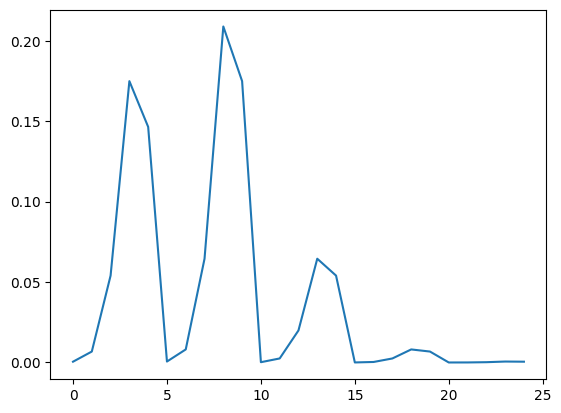

In [100]:
plt.plot(probDistVec)

### Simulation Equivalency
![title](img/multiParticleSimulEquiv.png)

The simulation of a multiparticle uantum walk is equivalent to the simulation of a single-particle quantum walk whose graph is the cartesian product of the subgraphs.

In [97]:
n = 5
time = 1

graph = nx.cartesian_product(nx.path_graph(n),nx.path_graph(n))

qw = QWAK(graph=graph,laplacian=True)
qw.runWalk(time=time,customStateList=[(4,1)])

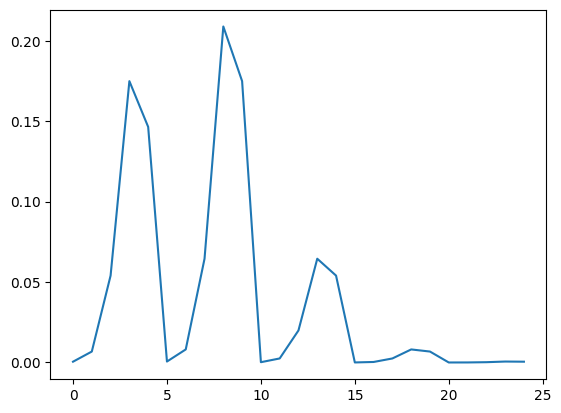

In [98]:
plt.plot(qw.getProbVec())